In [1]:
import numpy as np
import torch

In [2]:
import networkx as nx
from matplotlib import pyplot as plt
import math
from sympy import Matrix, init_printing
import IPython.display
init_printing()

In [45]:
G = nx.Graph()

In [58]:
G.add_node(torch.tensor([1,2,3]))
G.add_nodes_from([2,3])

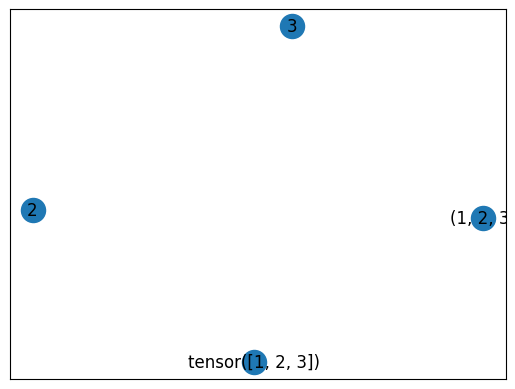

In [59]:
s = plt.subplot()
nx.draw_networkx(G)

In [40]:
x = torch.rand(2,2)
y = torch.tensor([[5,5],[5,5]], dtype=torch.float)
print(x)
print(y)

print(y.add_(x))
print(x)
print(y)



tensor([[0.7681, 0.9410],
        [0.8474, 0.7504]])
tensor([[5., 5.],
        [5., 5.]])
tensor([[5.7681, 5.9410],
        [5.8474, 5.7504]])
tensor([[0.7681, 0.9410],
        [0.8474, 0.7504]])
tensor([[5.7681, 5.9410],
        [5.8474, 5.7504]])


In [57]:
x = torch.tensor([[1,2],[3,4]], dtype=torch.float)
y = x.sub(torch.eye(2))
y + torch.eye(2) == x

tensor([[True, True],
        [True, True]])

In [58]:
x = torch.tensor([[1,2],[3,4]], dtype=torch.float)
x/2

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])

In [65]:
x = torch.rand(5,4)
x

tensor([[0.9191, 0.6612, 0.1066, 0.1755],
        [0.8340, 0.9257, 0.6597, 0.1201],
        [0.6774, 0.4046, 0.0075, 0.5162],
        [0.8771, 0.9602, 0.2541, 0.7050],
        [0.5736, 0.5782, 0.7411, 0.0398]])

In [124]:
print(x)
y = x[:3,0:3]
print(y)
print(y.transpose_(1,0))
print(y * y.transpose(1,0))

tensor([[0.9191, 0.6612, 0.1066, 0.1755],
        [0.8340, 0.9257, 0.6597, 0.1201],
        [0.6774, 0.4046, 0.0075, 0.5162],
        [0.8771, 0.9602, 0.2541, 0.7050],
        [0.5736, 0.5782, 0.7411, 0.0398]])
tensor([[0.9191, 0.6612, 0.1066],
        [0.8340, 0.9257, 0.6597],
        [0.6774, 0.4046, 0.0075]])
tensor([[0.9191, 0.8340, 0.6774],
        [0.6612, 0.9257, 0.4046],
        [0.1066, 0.6597, 0.0075]])
tensor([[8.4483e-01, 5.5145e-01, 7.2191e-02],
        [5.5145e-01, 8.5684e-01, 2.6689e-01],
        [7.2191e-02, 2.6689e-01, 5.6741e-05]])


In [109]:
a = np.array([2,2,4])
a == a.transpose()

array([ True,  True,  True])

In [22]:
x = torch.rand(1,2,3,4)
x

tensor([[[[0.1445, 0.2431, 0.5869, 0.2361],
          [0.1389, 0.1499, 0.1647, 0.6115],
          [0.7667, 0.0087, 0.7664, 0.8440]],

         [[0.3534, 0.6604, 0.4886, 0.1061],
          [0.1377, 0.4756, 0.3833, 0.9773],
          [0.7963, 0.6737, 0.6734, 0.1992]]]])

In [30]:
y = x.view(1,3,2,4)
y

tensor([[[[2.0000, 0.2431, 0.5869, 0.2361],
          [0.1389, 0.1499, 0.1647, 0.6115]],

         [[0.7667, 0.0087, 0.7664, 0.8440],
          [0.3534, 0.6604, 0.4886, 0.1061]],

         [[0.1377, 0.4756, 0.3833, 0.9773],
          [0.7963, 0.6737, 0.6734, 0.1992]]]])

In [63]:
x= torch.tensor([1], requires_grad=True, dtype=float)
x

tensor([1.], dtype=torch.float64, requires_grad=True)

In [64]:
y = x + 34
y

tensor([35.], dtype=torch.float64, grad_fn=<AddBackward0>)

In [65]:
y.backward()

In [66]:
x.grad

tensor([1.], dtype=torch.float64)

## From blog post

[Chain rule and Jacobian](https://heiner.ai/blog/2023/02/19/chain-rule-jacobians-autograd-shapes.html)

In [23]:
X = torch.tensor([1,2], dtype=float, requires_grad=True)
X

tensor([1., 2.], dtype=torch.float64, requires_grad=True)

In [26]:
Y = torch.empty(3)
Y[0] = X[0] * 2
Y[1] = X[0] + 2*X[1]
Y[2] = X[1] * 3
Y

tensor([2., 5., 6.], grad_fn=<CopySlices>)

In [27]:
Y.backward(torch.tensor([1,2,6], dtype=float))

In [20]:
x = torch.tensor([1.0, 2.0], requires_grad=True, dtype=float)

y = torch.empty(3)
y[0] = x[0] ** 2
y[1] = x[0] ** 2 + 5 * x[1] ** 2
y[2] = 3 * x[1]

v = torch.tensor([1.0, 2.0, 10.0])
y.backward(v)  # VJP.
print(x.grad)

tensor([ 6., 70.], dtype=torch.float64)


In [16]:
y

tensor([ 1., 21.,  6.], grad_fn=<CopySlices>)

In [28]:
X.grad

tensor([ 4., 22.], dtype=torch.float64)

Single Variable Function $ y = f(x) $

In [58]:
X = torch.tensor(20.0, requires_grad=True)
print(X.grad)
Y = 1/X
print(Y)
Y.backward()
X.grad

None
tensor(0.0500, grad_fn=<MulBackward0>)


tensor(-0.0025)

MultiVariable Function $ y_n = f(x_m) $

In [102]:
X = torch.tensor([1.0, 2.0], requires_grad=True)
X

tensor([1., 2.], requires_grad=True)

In [103]:
Y = torch.empty(3)
Y[0] = 2 * X[0]
Y[1] = 3 * X[0] + 2 * X[1]
Y[2] = 4 ** X[1]
Y.backward(torch.ones(3))
X.grad

tensor([ 5.0000, 24.1807])

In [105]:
x = torch.tensor([1.0, 2.0], requires_grad=True)

y = torch.empty(3)
y[0] = x[0] ** 2
y[1] = x[0] ** 2 + 5 * x[1] ** 2
y[2] = 3 * x[1]

v = torch.tensor([1.0, 2.0, 3.0])
y.backward(v)  # VJP.

print("y:", y)
print("x.grad:", x.grad)

# Manual computation.
dydx = torch.tensor(
    [
        [2 * x[0], 0],
        [2 * x[0], 10 * x[1]],
        [0, 3],
    ]
)

assert torch.equal(x.grad, v @ dydx)
print(x.grad)
print(v @ dydx)

y: tensor([ 1., 21.,  6.], grad_fn=<CopySlices>)
x.grad: tensor([ 6., 49.])
tensor([ 6., 49.])
tensor([ 6., 49.])


In [112]:
with torch.no_grad():
    print(x+2)
x

tensor([3., 4.])


tensor([1., 2.], requires_grad=True)

## Loss function

In [102]:
X = np.array([1.0, 2.0, 3.0, 4.0])
Y = np.array([2.0, 4.0, 6.0, 8.0])

In [103]:
w = 0.0

In [104]:
def forward(x):
    return w * x

In [105]:
def loss(y, y_pred):
    return ((y_pred-y)**2).mean()

Gradient

$ \hat{Y} = \frac{1}{N}*(wx - y)^2 $

$ \frac{d \hat{Y}}{d x} = \frac{1}{N} * 2x(wx-y) $

In [106]:
def grad(x, y, y_pred):
    ys=  2 * (x*(y_pred - y))
    print(ys)
    return ys.mean()
        

In [107]:
np.array([1,2,3]).mean()

In [108]:
np.dot(np.array([[1,2,3],[1,2,3]]), np.array([[1,2,3],[2,2,2]]).T)

array([[14, 12],
       [14, 12]])

In [109]:

np.array([[1,2,3],[1,2,3]]) @ np.array([[1,2,3],[2,2,2]]).T

array([[14, 12],
       [14, 12]])

In [110]:
np.array([[1,2,3],[1,2,3]]).shape

In [111]:
a = np.random.rand(5, 3, 2) * 10  # A batch of 5 matrices of size 3x2
b = np.random.rand(5, 2, 4) * 10 # A batch of 5 matrices of size 2x4
a = a.round()
b = b.round()
print('a', a)
print('b', b)
result  = np.dot(a,b)
print(result)

a [[[ 9.  8.]
  [ 2. 10.]
  [ 5.  3.]]

 [[ 2.  3.]
  [ 2.  3.]
  [ 9.  6.]]

 [[ 2.  4.]
  [ 7.  9.]
  [ 3. 10.]]

 [[ 9.  8.]
  [ 9.  6.]
  [ 9.  3.]]

 [[10.  1.]
  [ 7.  5.]
  [ 4.  6.]]]
b [[[ 4.  6.  0.  5.]
  [ 1.  5.  6.  1.]]

 [[ 3.  2.  3. 10.]
  [ 8. 10.  9. 10.]]

 [[ 3.  9.  4.  6.]
  [ 1.  6.  2.  8.]]

 [[ 1.  2.  6.  3.]
  [ 8.  6.  8.  4.]]

 [[ 1.  1.  9.  3.]
  [ 8.  4.  2.  1.]]]
[[[[ 44.  94.  48.  53.]
   [ 91.  98.  99. 170.]
   [ 35. 129.  52. 118.]
   [ 73.  66. 118.  59.]
   [ 73.  41.  97.  35.]]

  [[ 18.  62.  60.  20.]
   [ 86. 104.  96. 120.]
   [ 16.  78.  28.  92.]
   [ 82.  64.  92.  46.]
   [ 82.  42.  38.  16.]]

  [[ 23.  45.  18.  28.]
   [ 39.  40.  42.  80.]
   [ 18.  63.  26.  54.]
   [ 29.  28.  54.  27.]
   [ 29.  17.  51.  18.]]]


 [[[ 11.  27.  18.  13.]
   [ 30.  34.  33.  50.]
   [  9.  36.  14.  36.]
   [ 26.  22.  36.  18.]
   [ 26.  14.  24.   9.]]

  [[ 11.  27.  18.  13.]
   [ 30.  34.  33.  50.]
   [  9.  36.  14.  36.]
   [ 26.  2

### Training

In [112]:
for a in range(10):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    print(l)
    dw = grad(X,Y,y_pred)
    print('grad', dw)
    w -= 0.1 * dw
    

30.0
[ -4. -16. -36. -64.]
grad -30.0
7.5
[ 2.  8. 18. 32.]
grad 15.0
1.875
[ -1.  -4.  -9. -16.]
grad -7.5
0.46875
[0.5 2.  4.5 8. ]
grad 3.75
0.1171875
[-0.25 -1.   -2.25 -4.  ]
grad -1.875
0.029296875
[0.125 0.5   1.125 2.   ]
grad 0.9375
0.00732421875
[-0.0625 -0.25   -0.5625 -1.    ]
grad -0.46875
0.0018310546875
[0.03125 0.125   0.28125 0.5    ]
grad 0.234375
0.000457763671875
[-0.015625 -0.0625   -0.140625 -0.25    ]
grad -0.1171875
0.00011444091796875
[0.0078125 0.03125   0.0703125 0.125    ]
grad 0.05859375


In [92]:
X

array([1., 2., 3., 4.])

In [93]:
forward(X)

array([1.5984375, 3.196875 , 4.7953125, 6.39375  ])

In [94]:
forward(X).round()

array([2., 3., 5., 6.])

In [49]:
forward(np.array([245])).round()

array([490.])

In [41]:
np.round([23])

array([23])